In [1]:
from get_data import get_data
from strategies import lump_buy, cost_average
import seaborn as sns
import matplotlib.pyplot as plt

## Initial comparison of strategies

In [2]:
to_invest = 10_000
duration = 365*10 # days
frequency = 7 # days

ticker = "AAPL"

start = "02/06/2012"
end = "02/06/2022"

fractional = True

data = get_data(ticker, date_from=start, date_to=end, granularity="day", save=False)

Filtering existing data...


In [3]:
lump = lump_buy(data,start,end,value=to_invest, fractional_stocks=fractional)
lump.tail()

,date,current_total_value,cum_cost,cum_quantity
2512,2022-05-26,69942.789062,10000.0,497.512476
2513,2022-05-27,73390.554688,10000.0,497.512476
2514,2022-05-31,74106.968750,10000.0,497.512476
2515,2022-06-01,74281.093750,10000.0,497.512476
2516,2022-06-02,74213.937500,10000.0,497.512476


In [4]:
sub_inv_val = to_invest/(duration/frequency)
print(sub_inv_val)
ca = cost_average(data,start,end,frequency,value=sub_inv_val, fractional_stocks=fractional)
ca.tail()

19.17808219178082


,date,cost,quantity,buy_cost,cum_quantity,cum_cost,current_total_value
515,2022-05-03,158.815002,0.120757,19.178082,290.268984,9895.890411,46099.069349
516,2022-05-10,155.014999,0.123718,19.178082,290.392701,9915.068493,45015.224408
517,2022-05-17,149.050003,0.128669,19.178082,290.521370,9934.246575,43302.211091
518,2022-05-24,140.584991,0.136416,19.178082,290.657786,9953.424658,40862.122406
519,2022-06-02,149.169998,<NA>,<NA>,290.657786,9953.424658,43357.421453


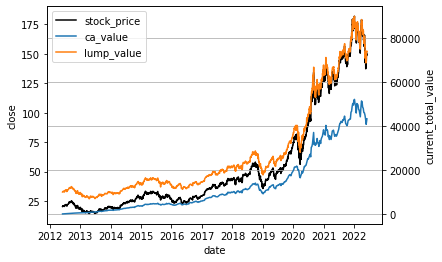

In [5]:
# Plot stock price
ax1 = sns.lineplot(x=data["date"],y=data["close"],color="black")
# ax1.legend(labels=["stock_price"])

# Plot cost-avg and lump on second y-axis
ax2 = plt.twinx()
sns.lineplot(x=ca["date"],y=ca["current_total_value"],ax=ax2)
# sns.lineplot(x=ca["date"],y=ca["cum_cost"],ax=ax)
sns.lineplot(x=lump["date"],y=lump["current_total_value"],ax=ax2)

# ax2.legend(labels=["ca_value","lump_value"])
plt.legend(
	[*list(ax1.lines),*list(ax2.lines)],
	["stock_price","ca_value","lump_value"]
)
plt.grid(visible=True,axis="both")

Over a 10 year period, investing the whole amount immediately gives, as expected, better returns than spreading the investment evenly throughout the period.